<img src="./Images/quantum.jpg" width="1000" height="1000" class="center">


# Quantum Computing

***

# What is Quantum Computing?
Quantum computing was introduced in 1980 when physicist Paul Benioff proposed a quantum mechanical model of the Turing machine.  Quantum mechanics is a fundamental theory in physics that arose in the mid 20th Century, quantum mechanics underlies the behaviour of atoms in the physical world. So, quantum computing is an area of technology that focuses on the principles of quantum theory, applying this theory to computing introduces new concepts and behaviours compared to the traditional programming methods. 

# How does a Quantum Computer work?
Traditional computers use bits that can only be of a single state as 0 or 1, they have a definite position of a physical state. Quantum computing uses the quantum state of an object known as a qubit. A qubit is a basic unit of quantum information and just like classical bits a qubit must have two distinct states represented by 0 and 1. 
However, a qubit can also exist in superposition states which are incompatible in measurements and can even be entangled with other qubits. Superposition refers to when a quantum computer can exist in multiple states at the same time. Without this theory a qubit would be quite useless on its own. Entanglement another quantum theory, allows quibits to be perfectly correlated with each other despite being in seperate states. This means qubit can represent a 0, a 1, or any proportion of 0 and 1 in superposition of both states, with a certain probability of being a 0 and a certain probability of being a 1. Below is an image showing the comparision of qubit compared to the regular bits.

<img src="./Images/qubit-vs-bit.jpg" width = "500" height = "500">



# Comparison of classical computers and quantum computers
<img src="./Images/why.png" width = "500" height = "500">

### Properties of a Classic Computer
- Calculates with qubits which can represent 0 and 1 simultaneously
- Power increases exponentially in proportion to the number of qubits
- High error rate
- Needs to be kept very cold
- Suited for optimized problems
- Very expensive to build

### Properties of a Quantum Computer
- Calculates with electric transistors represented by 0 or 1
- The power increases in a 1:1 relationship with the number of transistors
- Low error rate
- Can operate at room temp
- Handles every day processing
- Cheap to build

***

# Deutsch's Algorithm

The Deutsch-Jozsa algorithm is a deterministic quantum algorithm proposed by David Deutsch and Richard Jozsa in 1992, it was the first example of a quantum algorithm that performs better than the best classical algorithm. This was the first proof that quantum computing can be more advantageous than the traditional classical computing methods. 

## Deutschs Algorithm explained
- The Deutschs algorithm takes in a function in n bits as an input and returns it as a single bit as an output of (0 or 1).
- The algorithm then determines if the function is either constant by displaying 0 on all outputs or 1 on all outputs
- Or balanced where it returns 1 for half of the input and 0 for the other half.

In [1]:
# Qiskit itself and aer simulator
import qiskit
import qiskit.providers.aer as aer

In [2]:
# Diagrams
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Constant Zero Function

In [3]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [4]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [5]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [6]:
# Apply a Hadamard gate to first qubit.
circuit.h(0)

In [7]:
# Apply a Hadamard gate to second qubit.
circuit.h(1)

In [8]:
# Identity gate.
circuit.i(1)

In [9]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [10]:
# Measure the first qubit.
circuit.measure(0, 0)

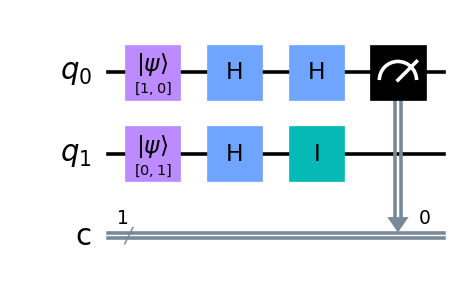

In [11]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [12]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [13]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [14]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [15]:
# Get the results.
results = job.result()

In [16]:
# Show the result counts.
counts = results.get_counts()
counts

{'0': 1000}

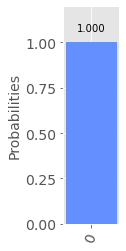

In [17]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Constant One Function
***

In [18]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [19]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [20]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [21]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [22]:
# X gate.
circuit.x(1)

In [23]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [24]:
# Measure the first qubit.
circuit.measure(0, 0)

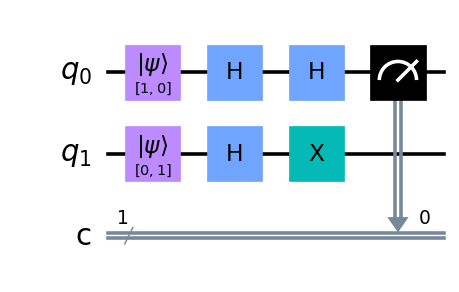

In [25]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [26]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [27]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [28]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [29]:
#Get the results.
results = job.result()

In [30]:
# Show the result counts.
counts = results.get_counts()

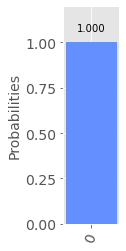

In [31]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Balanced Zero-One Function: $f(0) = 0, f(1) = 1$
***

In [32]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [33]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [34]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [35]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [36]:
# CNOT gate.
circuit.cnot(0, 1)

In [37]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [38]:
# Measure the first qubit.
circuit.measure(0, 0)

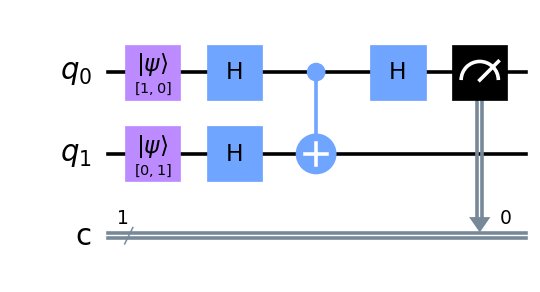

In [39]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [40]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [41]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [42]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [43]:
# Get the results.
results = job.result()

In [44]:
# Show the result counts.
counts = results.get_counts()

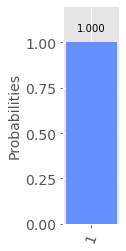

In [45]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Balanced One-Zero Function: $f(0) = 1, f(1) = 0$
***

In [46]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [47]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [48]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [49]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [50]:
# CNOT gate.
circuit.cnot(0, 1)

In [51]:
# Apply x to second qubit.
circuit.x(1)

In [52]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [53]:
# Measure the first qubit.
circuit.measure(0, 0)

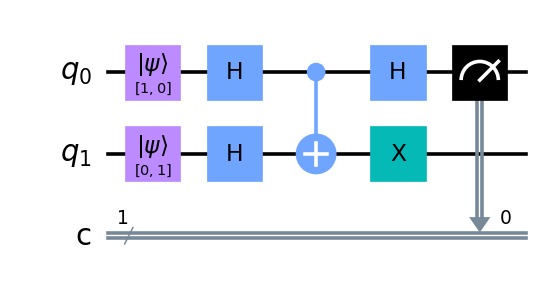

In [54]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [55]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [56]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [57]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [58]:
# Get the results.
results = job.result()

In [59]:
# Show the result counts.
counts = results.get_counts()
counts

{'1': 1000}

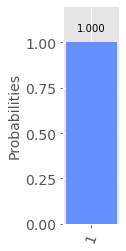

In [60]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Deutsch's Algorithm with Random Function
***

In [61]:
# Import random for function
import random

In [62]:
# Return a random (part of) circuit - implementing the quantum oracle for f.
def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one of the four functions at random.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function. f(0) = f(1) = 0.
    # 2: Constant 1 function. f(0) = f(1) = 1.
    # 3: Balanced identity function. f(0) = 0, f(1) = 1.
    # 4: Balanced not function. f(0) = 1, f(1) = 0.
    
    if f_number == 1:
        # Apply Identity gate to second qubit.
        circuit.i(1)
    elif f_number == 2:
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    elif f_number == 3:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
    elif f_number == 4:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

### Create First Part of Circuit
***

In [63]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

In [64]:
# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [65]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [66]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [67]:
# Separate parts of circuit.
circuit.barrier()

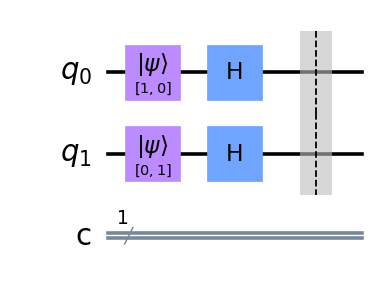

In [68]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Create Second Part of Circuit
***

In [69]:
# Append the random_f() circuit to circuit.
circuit.compose(random_f(), inplace=True)

In [70]:
# Separate parts of circuit.
circuit.barrier()

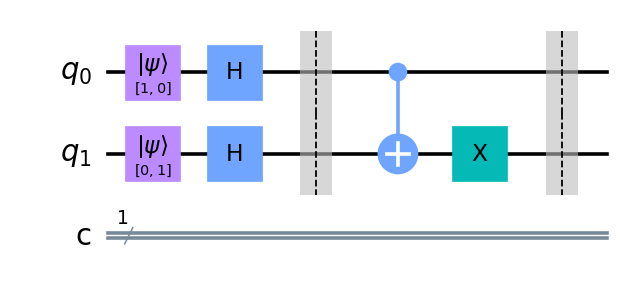

In [71]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Create Third Part of Circuit
***

In [72]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [73]:
# Measure the first qubit.
circuit.measure(0, 0)

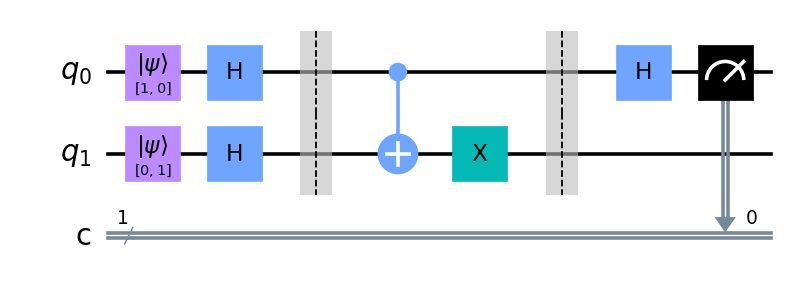

In [74]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

### Simulation and Decision
***

In [75]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

In [76]:
# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

In [77]:
# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

In [78]:
# Get the results.
results = job.result()

In [79]:
# Show the result counts.
counts = results.get_counts()

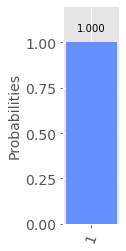

In [80]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***

# References

[Sciencealert](https://www.sciencealert.com/quantum-computers) *How Do Quantum Computers Work?*

[IBM](https://www.ibm.com/quantum-computing/what-is-quantum-computing/) *What is quantum computing?*

[Qiskit](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html) *Deutsch-Jozsa Algorithm*

[Quantum-inspire](https://www.quantum-inspire.com/kbase/what-is-a-qubit/) *What is a qubit?*

[Microsoft Azure](https://azure.microsoft.com/en-us/overview/what-is-quantum-computing/#how-it-works) *Introduction to quantum computing*
